In [14]:
!pip install keras_preprocessing

In [15]:
import os
import zipfile
import urllib.request
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, Model

In [16]:
# Download & Ekstrak Dataset
data_url = 'https://drive.usercontent.google.com/download?id=1T2vteOAvBrj23MK3ry_ynLWli4_gNbqe&export=download&confirm=t'
urllib.request.urlretrieve(data_url, 'Datasets.zip')
zip_ref = zipfile.ZipFile('Datasets.zip', 'r')
zip_ref.extractall('Datasets')
zip_ref.close()

base_dir = 'Datasets'
train_path = os.path.join(base_dir, 'Dataset/train')
val_path = os.path.join(base_dir, 'Dataset/validation')
test_path = os.path.join(base_dir, 'Dataset/test')

In [17]:
# ImageDataGenerator (Augmentasi & Preprocessing)
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path, target_size=(299, 299), batch_size=64, class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = val_datagen.flow_from_directory(
    val_path, target_size=(299, 299), batch_size=64, class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_path, target_size=(299, 299), batch_size=64, class_mode='categorical'
)

Found 1062 images belonging to 3 classes.
Found 298 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [18]:
# Load Xception Pretrained Model
base_model = Xception(input_shape=(299, 299, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False
last_output = base_model.output

In [19]:
# Tambahkan Fully Connected Layer
x = layers.GlobalAveragePooling2D()(last_output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(3, activation='softmax')(x)

# Buat Model
model = Model(base_model.input, x)

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

# Callbacks Lengkap
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'Xception_model.h5', monitor='val_acc', save_best_only=True, verbose=1)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Training
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.3415 - loss: 1.1117
Epoch 1: val_acc improved from -inf to 0.50671, saving model to Xception_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - acc: 0.3424 - loss: 1.1107 - val_acc: 0.5067 - val_loss: 1.0500 - learning_rate: 1.0000e-04
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.4815 - loss: 1.0387
Epoch 2: val_acc improved from 0.50671 to 0.62081, saving model to Xception_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - acc: 0.4829 - loss: 1.0378 - val_acc: 0.6208 - val_loss: 0.9818 - learning_rate: 1.0000e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.5828 - loss: 0.9712
Epoch 3: val_acc improved from 0.62081 to 0.63423, saving model to Xception_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.5825 - loss: 0.9704 - val_acc: 0.6342 - val_loss: 0.9183 - learning_rate: 1.0000e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.6037 - loss: 0.9100
Epoch 4: val_acc improved from 0.63423 to 0.65436, saving model to Xception_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.6033 - loss: 0.9098 - val_acc: 0.6544 - val_loss: 0.8591 - learning_rate: 1.0000e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.6297 - loss: 0.8513
Epoch 5: val_acc improved from 0.65436 to 0.66107, saving model to Xception_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.6293 - loss: 0.8507 - val_acc: 0.6611 - val_loss: 0.8052 - learning_rate: 1.0000e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.6187 - loss: 0.8255
Epoch 6: val_acc improved from 0.66107 to 0.68792, saving model to Xception_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.6194 - loss: 0.8250 - val_acc: 0.6879 - val_loss: 0.7720 - learning_rate: 1.0000e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.6553 - loss: 0.7724
Epoch 7: val_acc improved from 0.68792 to 0.71141, saving model to Xception_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.6554 - loss: 0.7726 - val_acc: 0.7114 - val_loss: 0.7408 - learning_rate: 1.0000e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7009 - loss: 0.7441
Epoch 8: val_acc did not improve from 0.71141
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.7001 - loss: 0.7441 - val_acc: 0.6946 - val_loss: 0.7324 - learning_rate: 1.0000e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.6810 - loss: 0.7259
Epoch 9: val_acc improved from 0.71141 to 0.73154, saving model to Xception_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.6810 - loss: 0.7260 - val_acc: 0.7315 - val_loss: 0.6944 - learning_rate: 1.0000e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.6662 - loss: 0.7459
Epoch 10: val_acc did not improve from 0.73154
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.6672 - loss: 0.7451 - val_acc: 0.7148 - val_loss: 0.6971 - learning_rate: 1.0000e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7220 - loss: 0.6911
Epoch 11: val_acc did not improve from 0.73154
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.7215 - loss: 0.6909 - val_acc: 0.7248 - val_loss: 0.6742 - learning_rate: 1.0000e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7361 - loss: 0.6416
Epoch 12: val_acc improved from 0.73154 to 0.74497, saving model to Xception_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.7356 - loss: 0.6435 - val_acc: 0.7450 - val_loss: 0.6586 - learning_rate: 1.0000e-04
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.6916 - loss: 0.6840
Epoch 13: val_acc improved from 0.74497 to 0.76174, saving model to Xception_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.6926 - loss: 0.6828 - val_acc: 0.7617 - val_loss: 0.6377 - learning_rate: 1.0000e-04
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.6894 - loss: 0.6857
Epoch 14: val_acc did not improve from 0.76174
17/17 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.6899 - loss: 0.6855 - val_acc: 0.7483 - val_loss: 0.6305 - learning_rate: 1.0000e-04
Epoch 15/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7436 - loss: 0.6230
Epoch 15: val_acc did not improve from 0.76174
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.7429 - loss: 0.6237 - val_acc: 0.7584 - val_loss: 0.6247 - learning_rate: 1.0000e-04
Epoch 16/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7378 - loss: 0.6253
Epoch 16: val_acc did not improve from 0.76174
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.7367 - loss: 0.6264 - val_acc: 0.7450 - val_loss: 0.6235 - learning_rate: 1.0000e-04
Epoch 17/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7325 - loss: 0.6392
Epoch 1

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.7315 - loss: 0.6260 - val_acc: 0.7752 - val_loss: 0.5919 - learning_rate: 1.0000e-04
Epoch 20/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7540 - loss: 0.5958
Epoch 20: val_acc did not improve from 0.77517
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.7530 - loss: 0.5973 - val_acc: 0.7651 - val_loss: 0.5864 - learning_rate: 1.0000e-04
Epoch 21/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7442 - loss: 0.6129
Epoch 21: val_acc did not improve from 0.77517
17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - acc: 0.7439 - loss: 0.6125 - val_acc: 0.7584 - val_loss: 0.5906 - learning_rate: 1.0000e-04
Epoch 22/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7531 - loss: 0.5884
Epoch 22: val_acc did not improve from 0.77517
17/17 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - acc: 0.7523 - loss: 0.5885 - val_acc: 0.7550 - val_loss: 0.5716 - learning_rate: 1.0000e-04
Epoch 23/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7391 - loss: 0.6329
Epoch 2

In [20]:
train_path = os.path.join(base_dir, "Dataset/train")
val_path = os.path.join(base_dir, "Dataset/validation")
test_path = os.path.join(base_dir, "Dataset/test")

train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=128,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
validation_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size=(299, 299),
    batch_size=128,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=128,
    class_mode='categorical'
)

model = tf.keras.models.load_model('Xception_model.h5')

train_loss, train_acc = model.evaluate(train_generator, verbose=1)
val_loss, val_acc = model.evaluate(validation_generator, verbose=1)
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print(f"Train Accuracy: {train_acc:.4f}, Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

Found 1062 images belonging to 3 classes.
Found 298 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


9/9 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - acc: 0.7665 - loss: 0.5684
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - acc: 0.7899 - loss: 0.5752
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 9s/step - acc: 0.7266 - loss: 0.6372
Train Accuracy: 0.7561, Loss: 0.5911
Validation Accuracy: 0.7752, Loss: 0.5919
Test Accuracy: 0.7267, Loss: 0.6298


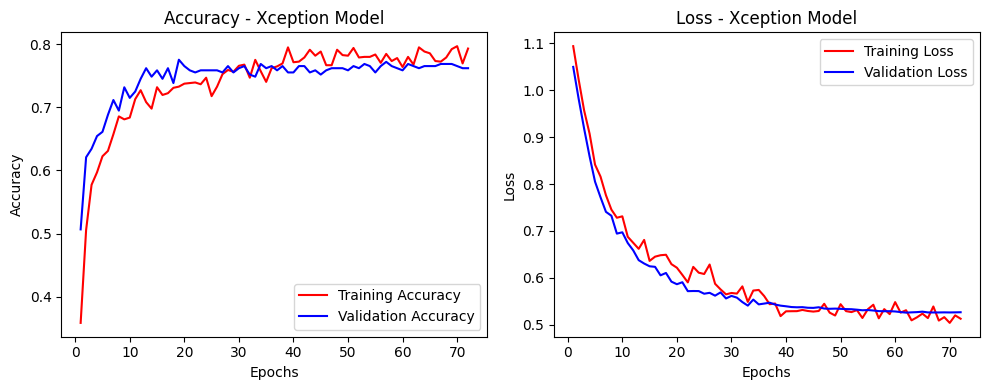

In [21]:
import matplotlib.pyplot as plt

# Ambil riwayat dari training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Akurasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Accuracy - Xception Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss - Xception Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical

In [23]:
def load_and_process_image(image_path, target_size=(299, 299)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    return img_array

def load_test_data(test_dir, class_names):
    data = []
    labels = []
    class_mapping = {name: idx for idx, name in enumerate(class_names)}
    for class_name in class_names:
        class_path = os.path.join(test_dir, class_name)
        if not os.path.isdir(class_path):
            print(f"Warning: Folder {class_path} not found.")
            continue
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                data.append(load_and_process_image(image_path))
                labels.append(class_mapping[class_name])
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
    return np.array(data), np.array(labels)

Error loading image Datasets/Dataset/validation/Bagus/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7f174947f970>
Error loading image Datasets/Dataset/validation/Rusak Berat/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7f16d0705a80>
Error loading image Datasets/Dataset/validation/Rusak Ringan/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7f17483d93a0>


10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step


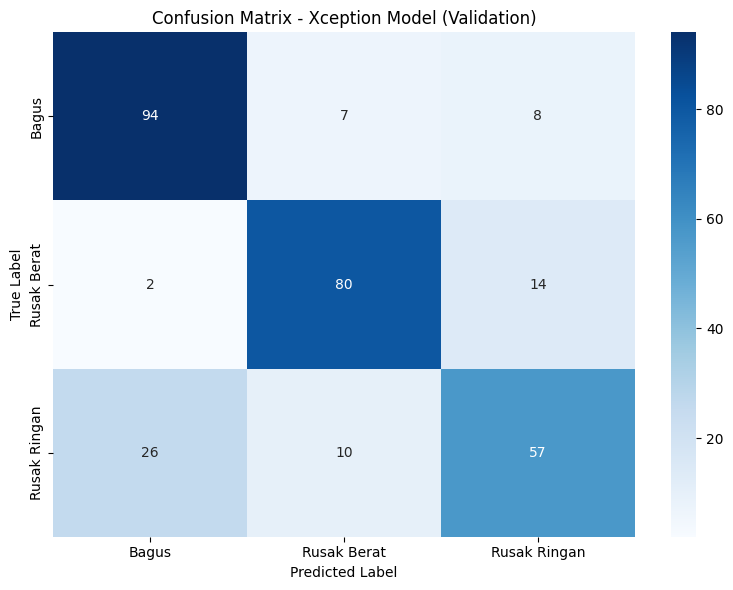


Classification Report (Validation Data):
              precision    recall  f1-score   support

       Bagus       0.77      0.86      0.81       109
 Rusak Berat       0.82      0.83      0.83        96
Rusak Ringan       0.72      0.61      0.66        93

    accuracy                           0.78       298
   macro avg       0.77      0.77      0.77       298
weighted avg       0.77      0.78      0.77       298



In [24]:
test_data_dir = val_path
class_names = sorted(os.listdir(test_data_dir))
X_test, y_test = load_test_data(test_data_dir, class_names)

model = keras.models.load_model('Xception_model.h5')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(to_categorical(y_test, num_classes=len(class_names)), axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Xception Model (Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("\nClassification Report (Validation Data):")
print(class_report)

Error loading image Datasets/Dataset/train/Rusak Ringan/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7f16d0513d80>
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 375ms/step


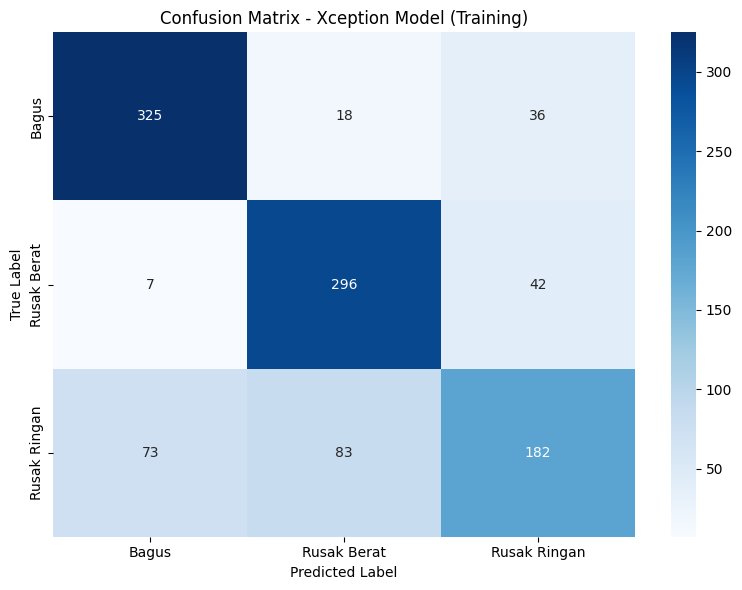


Classification Report (Training Data):
              precision    recall  f1-score   support

       Bagus       0.80      0.86      0.83       379
 Rusak Berat       0.75      0.86      0.80       345
Rusak Ringan       0.70      0.54      0.61       338

    accuracy                           0.76      1062
   macro avg       0.75      0.75      0.75      1062
weighted avg       0.75      0.76      0.75      1062



In [25]:
test_data_dir = train_path
class_names = sorted(os.listdir(test_data_dir))
X_test, y_test = load_test_data(test_data_dir, class_names)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(to_categorical(y_test, num_classes=len(class_names)), axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Xception Model (Training)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("\nClassification Report (Training Data):")
print(class_report)

Error loading image Datasets/Dataset/test/Bagus/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7f17483979c0>
Error loading image Datasets/Dataset/test/Rusak Berat/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7f1735fe1c60>
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 704ms/step


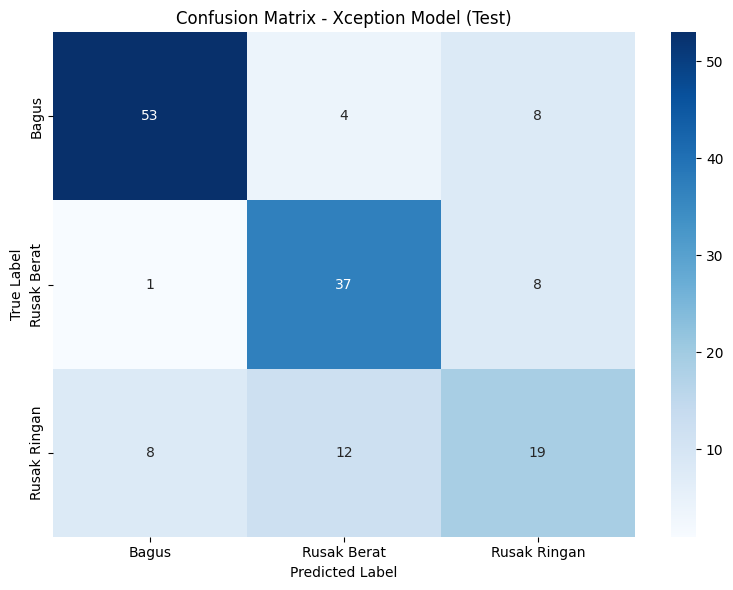


Classification Report (Test Data):
              precision    recall  f1-score   support

       Bagus       0.85      0.82      0.83        65
 Rusak Berat       0.70      0.80      0.75        46
Rusak Ringan       0.54      0.49      0.51        39

    accuracy                           0.73       150
   macro avg       0.70      0.70      0.70       150
weighted avg       0.73      0.73      0.72       150



In [26]:
test_data_dir = test_path
class_names = sorted(os.listdir(test_data_dir))
X_test, y_test = load_test_data(test_data_dir, class_names)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(to_categorical(y_test, num_classes=len(class_names)), axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Xception Model (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("\nClassification Report (Test Data):")
print(class_report)